# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

En el archivo temp, tenemos datos referentes a la temperatura en diferentes ciudades, que a su vez se hallan en diferentes estados.

* Variable objetivo;
  * Temperature (cuantitativa, de intervalo)
* Variables independientes:
  * City (Cualitativa, politomica, nominal)
  * State (Cualitativa, politomica, nominal)

#### Selecciona las filas en las que el estado es New York

In [18]:
temp_newyork = temp.loc[temp['State'] == 'New York']
print(f"DataFrame con las filas en las que el estado es New York:\n{temp_newyork}")	

DataFrame con las filas en las que el estado es New York:
      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [16]:
t_media_newyork_cities = temp_newyork['Temperature'].mean()
print(f"Temperatura media de las ciudades de Nueva York: {t_media_newyork_cities}")

Temperatura media de las ciudades de Nueva York: 10.74074074074074


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [22]:
temp_mayor_15 = temp.loc[temp['Temperature'] > 15]
print(f"{temp_mayor_15}")

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [25]:
ciudades_mayor_15 = temp_mayor_15['City']
print(f"{ciudades_mayor_15}")

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [27]:
temp_entre_15_y_20 = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
print(f"{temp_entre_15_y_20}")

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222


In [28]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [34]:
temp_media_por_estado = temp.groupby(by='State')['Temperature'].mean()
temp_std_por_estado = temp.groupby(by='State')['Temperature'].std()

print(f"Media de temperatura de cada estado:\n{temp_media_por_estado}")
print(f"\nDesviación estandard de la temperatura de cada estado:\n{temp_std_por_estado}")

Media de temperatura de cada estado:
State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

Desviación estandard de la temperatura de cada estado:
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [39]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore los tipos de datos del marco de datos Employee. Comenta tus resultados

Los datos del archivo Employee muestran distintos trabajadores, con diferentes categorias asociadas a los mismos.

* Variable objetivo;
  * Salary (Cuantitativa, discreta, de razon)
* Variables independientes:
  * Name (Cualitativa, politomica, nominal)
  * Department (Cualitativa, politomica, nominal)
  * Education (Cualitativa, politomica, ordinal)
  * Gender (Cualitativa, dicotomica, nominal)
  * Title (Cualitativa, politomica, nominal)
  * Years (Cuantitativa, discreta, de razon)

#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

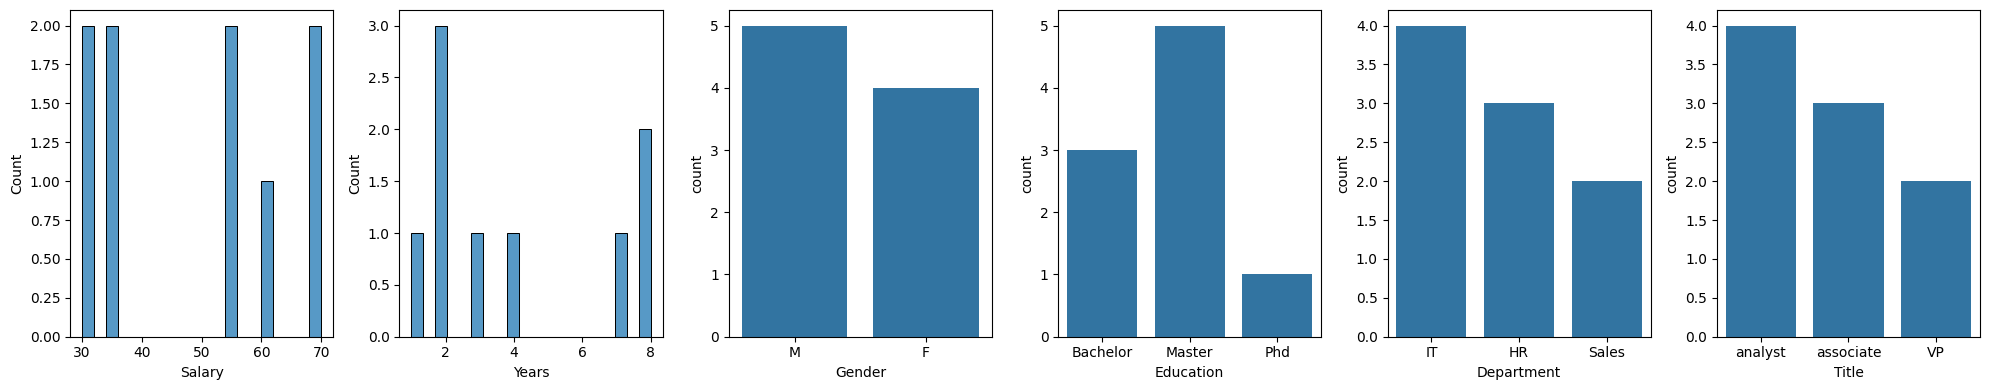

In [66]:
fig, ax = plt.subplots(1, 6, figsize=(20, 4))

sns.histplot(data=employee, x="Salary", bins=20, ax=ax[0])
ax[0].set_xlabel('Salary')

sns.histplot(data=employee, x="Years", bins=20, ax=ax[1])
ax[1].set_xlabel('Years')

sns.countplot(data=employee, x="Gender", ax=ax[2])
ax[2].set_xlabel('Gender')

sns.countplot(data=employee, x="Education", ax=ax[3])
ax[3].set_xlabel('Education')

sns.countplot(data=employee, x="Department", ax=ax[4])
ax[4].set_xlabel('Department')

sns.countplot(data=employee, x="Title", ax=ax[5])
ax[5].set_xlabel('Title')

plt.tight_layout()
plt.show()

* Salary: Se observa dos poblaciones, una en 30-35 y el resto mayor a 55
* Years: También se observan dos poblaciones, una en 4 años y menos y la otra en 7 y 8 años, estando la mayoria de los empleados en la zona de menos de 4 años.
* Gender: Estan a la par, hay solamente 1 M mas que F.
* Education: Hay solamente un empleado con Phd, siendo el menos abundante, mientras que la mayoria tiene un master.
* Department: Donde hay mas empleados es en el departamento de IT, seguido de HR y por ultimo sales, aunque sin mucha diferencia entre ellos.
* Title: La mayoria son analyst, luego associate y por ultimo VP, igual que en la variable anterior no hay mucha diferencia entre empleados entre los grupos.

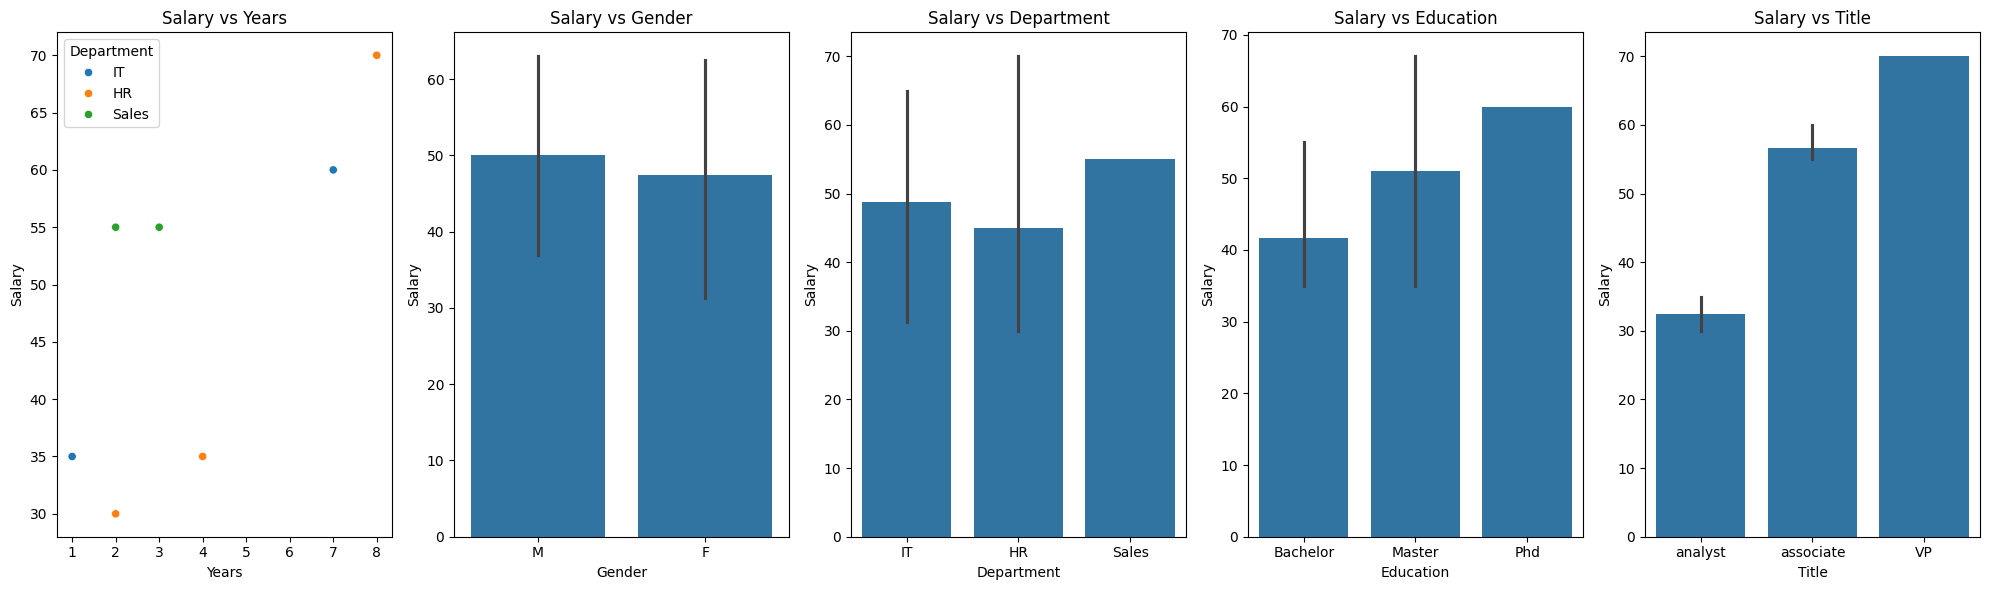

In [84]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 5, 1)
sns.scatterplot(data=employee, x='Years', y='Salary', hue='Department')
plt.title('Salary vs Years')
plt.xlabel('Years')
plt.ylabel('Salary')

plt.subplot(1, 5, 2)
sns.barplot(data=employee, x='Gender', y='Salary')
plt.title('Salary vs Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')

plt.subplot(1, 5, 3)
sns.barplot(data=employee, x='Department', y='Salary')
plt.title('Salary vs Department')
plt.xlabel('Department')
plt.ylabel('Salary')

plt.subplot(1, 5, 4)
sns.barplot(data=employee, x='Education', y='Salary')
plt.title('Salary vs Education')
plt.xlabel('Education')
plt.ylabel('Salary')

plt.subplot(1, 5, 5)
sns.barplot(data=employee, x='Title', y='Salary')
plt.title('Salary vs Title')
plt.xlabel('Title')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


En este segundo conjunto de graficos se contrastan las diferentes variables con el salario, para observar mejor cuales son los empleados con mayores salarios.
* En general se puede deducir, que mas años en la empresa implica un mayor salario. 
* En general el departamento de ventas tiene mayor salario.
* A mas educacion mayor salario.
* El titulo influye de manera significativa en el salario.

#### ¿Cuál es el salario medio en esta empresa?

In [85]:
salario_medio = employee['Salary'].mean()
print(f"Salario medio de la empresa: {salario_medio}")

Salario medio de la empresa: 48.888888888888886


#### ¿Cuál es el salario más alto?

In [86]:
salario_maximo = employee['Salary'].max()
print(f"Salario maximo de la empresa: {salario_maximo}")

Salario maximo de la empresa: 70


#### ¿Cuál es el salario más bajo?

In [87]:
salario_minimo = employee['Salary'].min()
print(f"Salario minimo de la empresa: {salario_minimo}")

Salario minimo de la empresa: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [92]:
empleados_menor_salario = employee.nsmallest(2, 'Salary')
print(f"Empleados con menor salario:\n{empleados_menor_salario}")

Empleados con menor salario:
    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [96]:
info_david = employee.loc[employee['Name'] == 'David']
info_david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [97]:
info_david['Salary']

2    30
Name: Salary, dtype: int64

#### Printea todas las líneas en las que el cargo es asociado

In [98]:
lineas_asociado = employee.loc[employee['Title'] == 'associate']
lineas_asociado                  

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [99]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [101]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [104]:
asociado_salario_superior_55 = employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
asociado_salario_superior_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [106]:
salarios_medios_por_anos = employee.groupby(by='Years')['Salary'].mean()
salarios_medios_por_anos

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

#### ¿Cuál es el salario medio por título?

In [107]:
salarios_medios_por_titulo = employee.groupby(by='Title')['Salary'].mean()
salarios_medios_por_titulo

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

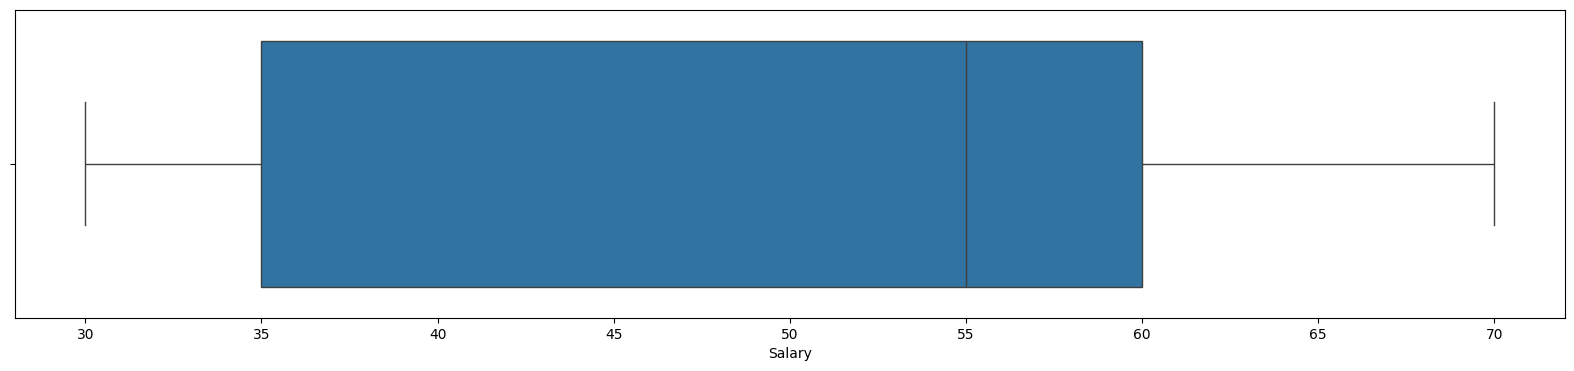

In [109]:
plt.figure(figsize=(20,4))

sns.boxplot(data=employee, x='Salary')

plt.show()

In [115]:
Q1 = employee['Salary'].quantile(0.25)
Q1

np.float64(35.0)

In [116]:
Q3 = employee['Salary'].quantile(0.75)
Q3

np.float64(60.0)

#### ¿Es diferente el salario medio por género?

In [119]:
salario_por_genero = employee.groupby(by='Gender')['Salary'].mean()
salario_por_genero

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [120]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [121]:
salario_medio = employee['Salary'].mean()
salario_maximo = employee['Salary'].max()
salario_minimo = employee['Salary'].min()

anos_medio = employee['Salary'].mean()
anos_maximo = employee['Salary'].max()
anos_minimo = employee['Salary'].min()

print(f"salario_medio:{salario_medio}")
print(f"salario_maximo:{salario_maximo}")
print(f"salario_minimo:{salario_minimo}")
print(f"anos_medio:{anos_medio}")
print(f"anos_maximo:{anos_maximo}")
print(f"anos_minimo:{anos_minimo}")

salario_medio:48.888888888888886
salario_maximo:70
salario_minimo:30
anos_medio:48.888888888888886
anos_maximo:70
anos_minimo:30


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [123]:
diferencia_salarios_agg = employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min())
diferencia_salarios_agg

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

In [127]:
diferencia_salarios_apply = employee.groupby('Department')['Salary'].apply(lambda x: x.max() - x.min())
diferencia_salarios_apply

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [128]:
orders = pd.read_csv('Orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [129]:
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


Tipos de datos:
* Unnamed: 0: Indice numerico
* InvoiceNo: Numero que se repite en bloques
* StockCode: Codigo alfanumerico, ¿unico?
* year: Numerico entero, muestra un año
* month: Numerico entero, muestra un mes
* day: Numerico entero, muestra un dia
* hour: Numerico entero, muestra un numero de horas
* Description: Un string con una descripcion de un producto
* Quantity: Numerico entero, muestra una cantidad de productos
* InvoiceDate: Numerico, fecha y hora
* UnitPrice: Numerico float, muestra un precio con dos decimales
* CustomerID: Numerico entero, muestra un numero que se repite en bloques
* Country: Cualitativo, politomico, nominal
* amount_spent: Cuantitativo, intervalo, de razon

In [ ]:
estadisticas_resumen = orders[['Quantity', 'UnitPrice', 'amount_spent']].describe()
estadisticas_resumen

#### ¿Cuál es el precio medio de compra?

In [ ]:
precio_medio_compra = orders['amount_spent'].mean()
precio_medio_compra

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [ ]:
precio_maximo_compra = orders['amount_spent'].max()
precio_maximo_compra

In [ ]:
precio_minimo_compra = orders['amount_spent'].min()
precio_minimo_compra

#### Seleccione todos los clientes que tenemos en España

In [ ]:
clientes_espana = orders.loc[orders['Country'] == 'Spain']
clientes_espana

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [ ]:
n_clientes_espana = clientes_espana.value_counts()
n_clientes_espana

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [ ]:
clientes_mas_50_articulos = orders.loc[orders['Quantity'] > 50]
clientes_mas_50_articulos

,Quantity,UnitPrice,amount_spent
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749
std,180.420210,22.096788,309.055588
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


#### Selecciona pedidos de España superiores a 50 artículos

In [ ]:
pedidos_espana_mas_50 = orders.loc[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
pedidos_espana_mas_50

#### Seleccionar todos los pedidos gratuitos

In [ ]:
pedidos_gratuitos = orders.loc[orders['UnitPrice'] == 0]
pedidos_gratuitos

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [ ]:
pedidos_lunch_bag = orders[orders['Description'].str.contains('lunch bag', case=False)]
pedidos_lunch_bag

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [ ]:
pedidos_2011_lunch_bag = orders[(orders['year'] == 2011) & (orders['Description'].str.contains('lunch bag', case=False))]
pedidos_2011_lunch_bag

#### Muestra la distribución de frecuencias del importe gastado en España.

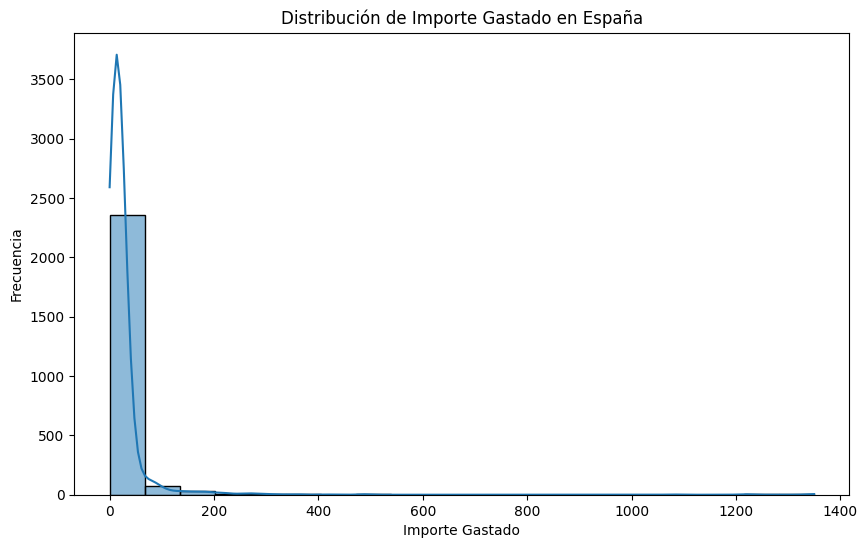

In [136]:
importes_espana = orders.loc[orders['Country'] == 'Spain', 'amount_spent']

plt.figure(figsize=(10, 6))
sns.histplot(importes_espana, bins=20, kde=True)
plt.title('Distribución de Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')

plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [ ]:
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'])
pedidos_agosto = orders[orders['InvoiceDate'].dt.month == 8]

pedidos_agosto

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [ ]:
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'])
pedidos_agosto = orders[orders['InvoiceDate'].dt.month == 8]
pedidos_por_pais = pedidos_agosto['Country'].value_counts()

pedidos_por_pais

#### ¿Cuál es el gasto medio por país?

In [ ]:
gasto_medio_por_pais = orders.groupby('Country')['amount_spent'].mean()
gasto_medio_por_pais

#### ¿Cuál es el artículo más caro?

In [ ]:
articulo_mas_caro = orders.loc[orders['UnitPrice'].idxmax()]
articulo_mas_caro

#### ¿Cuál fue la cantidad media gastada al año?

In [ ]:
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'])
cantidad_media_gastada_por_ano = orders.groupby(orders['InvoiceDate'].dt.year)['amount_spent'].mean()

cantidad_media_gastada_por_ano